## Project 1 - Programming for Data Analysis
Due: 4th of December 2022.

**Requirements:** _"For this project you must create a data set by simulating a real-world phenomenon of your choosing."_

**Background:** The aim of this report was to create a dataset assessing the change in cigarette use from tobacco to electronic based cigarettes and if a link exists between usage and illness between 2019 and 2022 within Ireland.

1. Creating a data frame of unique respondents
     -  _Initial dataset_
     -  _Categorical variables_
     -  _Binary variables_
     -  _Numeric data_
5. Results
6. Discussion
7. References

**_Load Libraries_**

In [360]:
import numpy as np

In [361]:
import matplotlib.pyplot as plt

In [362]:
%pip install seaborn

In [363]:
import pandas as pd

In [364]:
import seaborn as sns

In [283]:
import matplotlib.font_manager as font_manager

#### **Initial Dataset**

In [525]:
dataset = 1000
response_id = np.random.randint(1, 1000, dataset)
df = pd.DataFrame({"Response ID":response_id})

#### **Categorical Variables**

In [526]:
df['Residence'] = np.random.choice(["City","Town", "Rural"], size=dataset, p=[.37,.42,.21])
df['Year'] = np.random.choice([2018, 2019, 2020, 2021, 2022], size=dataset, p=[.2,.2,.2,.2,.2])
df['Frequency'] = np.random.randint(1,10 , dataset)
df['Age'] = np.random.randint(low=17, high=60, size=dataset)
df.head()

,Response ID,Residence,Year,Frequency,Age
0,899,Rural,2020,1,39
1,327,City,2021,6,24
2,965,Town,2020,5,54
3,17,City,2021,8,19
4,943,Town,2019,9,18


#### **Binary Varibles**

In [527]:
df['Gender'] = np.random.choice(["Male","Female"], size=dataset)
df['Illness'] = np.random.choice(["Yes","No"], size=dataset)
df['Type'] = np.random.choice(["Tobacco","e-Cigarettes"], size=dataset, p=[.695,.305])
df.tail()

,Response ID,Residence,Year,Frequency,Age,Gender,Illness,Type
995,775,Rural,2018,3,24,Male,No,e-Cigarettes
996,880,Rural,2019,1,57,Female,Yes,Tobacco
997,157,Town,2022,7,44,Female,Yes,Tobacco
998,878,City,2022,6,19,Male,No,Tobacco
999,370,City,2020,4,56,Male,No,e-Cigarettes


#### **Numeric Variables**

In [528]:
cost = []
for row in df['Frequency']:
        if row < 2 :    cost.append(float(np.random.uniform(10,20,1)))
        elif row < 4  : cost.append(float(np.random.uniform(21,40,1)))
        elif row < 6 : cost.append(float(np.random.uniform(41,60,1)))
        elif row < 8 :  cost.append(float(np.random.uniform(61,80,1)))        
        else:          cost.append(float(np.random.uniform(81,110,1)))

In [529]:
df['Cost'] = cost

In [530]:
df.loc[df['Frequency'] <= 5, 'Salary'] = df['Frequency']*df['Age']*100 
df.loc[df['Frequency'] > 5, 'Salary'] = df['Frequency']*df['Age']*100 + df['Cost']*15
df.head()

,Response ID,Residence,Year,Frequency,Age,Gender,Illness,Type,Cost,Salary
0,899,Rural,2020,1,39,Female,No,e-Cigarettes,18.663574,3900.000000
1,327,City,2021,6,24,Male,Yes,e-Cigarettes,68.164162,15422.462433
2,965,Town,2020,5,54,Female,No,Tobacco,51.073722,27000.000000
3,17,City,2021,8,19,Male,No,e-Cigarettes,87.593191,16513.897867
4,943,Town,2019,9,18,Male,No,Tobacco,106.117041,17791.755622


In [531]:
df['Cost']= df['Cost'].apply(lambda x:round(x,2))
df['Salary']= df['Salary'].apply(lambda x:round(x,2))
df.head()

,Response ID,Residence,Year,Frequency,Age,Gender,Illness,Type,Cost,Salary
0,899,Rural,2020,1,39,Female,No,e-Cigarettes,18.66,3900.00
1,327,City,2021,6,24,Male,Yes,e-Cigarettes,68.16,15422.46
2,965,Town,2020,5,54,Female,No,Tobacco,51.07,27000.00
3,17,City,2021,8,19,Male,No,e-Cigarettes,87.59,16513.90
4,943,Town,2019,9,18,Male,No,Tobacco,106.12,17791.76


In [532]:
df['Cost'] =np.float32(df['Cost'])
df['Salary'] = np.float32(df['Salary'])

In [533]:
print(df.dtypes)

Response ID      int32
Residence       object
Year             int32
Frequency        int32
Age              int32
Gender          object
Illness         object
Type            object
Cost           float32
Salary         float32
dtype: object


### **Results**

In [534]:
df.describe().T.apply(lambda x:round(x,2))

,count,mean,std,min,25%,50%,75%,max
Response ID,1000.0,498.32,283.69,1.00,262.00,499.00,747.00,997.00
Year,1000.0,2020.03,1.41,2018.00,2019.00,2020.00,2021.00,2022.00
Frequency,1000.0,5.01,2.61,1.00,3.00,5.00,7.00,9.00
Age,1000.0,38.26,12.66,17.00,27.00,39.00,49.00,59.00
Cost,1000.0,56.87,27.80,10.02,34.01,55.48,78.67,109.99
Salary,1000.0,19638.21,12713.32,1700.00,9000.00,17087.63,28018.68,54722.36


By default the describe method only shows statistics for the numeric variables. Using include = 'objects' computes the summary statistics for the string variables. 

In [535]:
df.describe(include='object')

,Residence,Gender,Illness,Type
count,1000,1000,1000,1000
unique,3,2,2,2
top,Town,Female,Yes,Tobacco
freq,406,516,511,697


In [536]:
df1= df.loc[:, ['Salary','Cost','Type', 'Illness']]
df1.groupby(['Type', 'Illness']).agg([np.mean, np.std]).apply(lambda x:round(x,2))

Salary                 Cost       
                              mean       std       mean    std
Type         Illness                                          
Tobacco      No       18823.519531  12883.88  53.770000  27.73
             Yes      20149.230469  12627.67  57.410000  27.90
e-Cigarettes No       19825.080078  12556.39  59.740002  26.65
             Yes      20057.220703  12722.50  59.639999  28.40

In [537]:
df2= df.loc[:, ['Salary','Cost','Type', 'Gender']]
df2.groupby(['Type', 'Gender']).agg([np.mean, np.std]).round(2)

Salary                 Cost       
                             mean       std       mean    std
Type         Gender                                          
Tobacco      Female  19652.080078  12573.24  56.770000  27.79
             Male    19360.189453  12962.29  54.520000  27.93
e-Cigarettes Female  20754.330078  12980.00  60.869999  27.91
             Male    18943.470703  12135.38  58.240002  27.01

In [547]:
font = font_manager.FontProperties(style='oblique', size=8) # To keep the ledger in the top right coner 

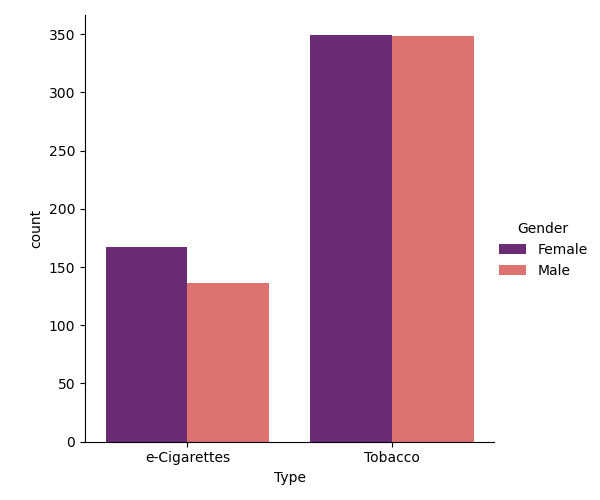

In [549]:
sns.catplot(x="Type", kind="count", hue = "Gender", palette='magma', data=df)
plt.show()

Here it shows the tobacco and e-cigarette analysis with respect to the gender.

1st column shows the number of tobacco smokers where the pink column shows that females represent a higher count of tobacco smokers then males.

2nd Column shows the number of males who smoke via e-cigarettes is slightly lower than female smokers.

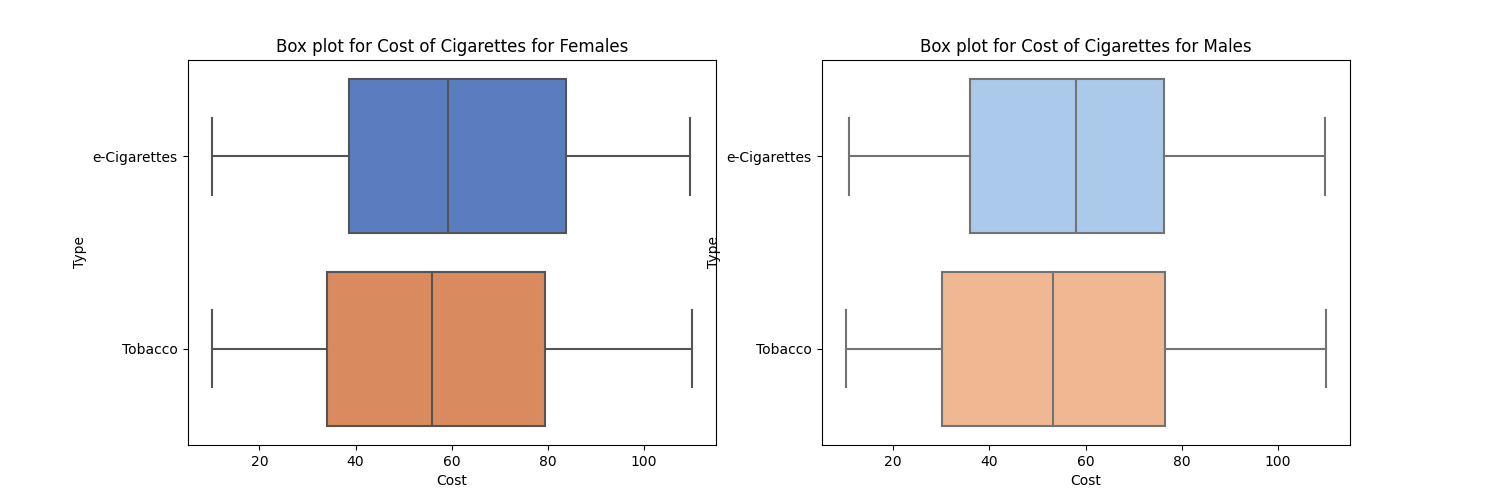

In [550]:
plt.subplots(figsize=(15,5))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
sns.boxplot(y="Type", x="Cost", data =  df[(df.Gender == 'Female')], palette = 'muted')
plt.title("Box plot for Cost of Cigarettes for Females")

plt.subplot(1, 2, 2) # index 2
sns.boxplot(y="Type", x="Cost", data =  df[(df.Gender == 'Male')], palette = 'pastel')
plt.title("Box plot for Cost of Cigarettes for Males")
plt.show()

The above boxplot shows the distribution of cost between cigarette types, split by gender. 

The medians (which generally will be close to the average) are at the same level for the female cohort. The left boxplot also shows normal distributions between types of cigarettes. For males, the distribution is slightly different, a higher medium cost is associated with tobacco cigarettes.

For e-Cigarette using males, the cost data is more dispersed (since the box is longer) and the distribution is positively skewed. This condition occurs because probabilities taper off more slowly when the cost is higher. Consequently, extreme values can be found far from the peak on the high end more frequently than on the low.

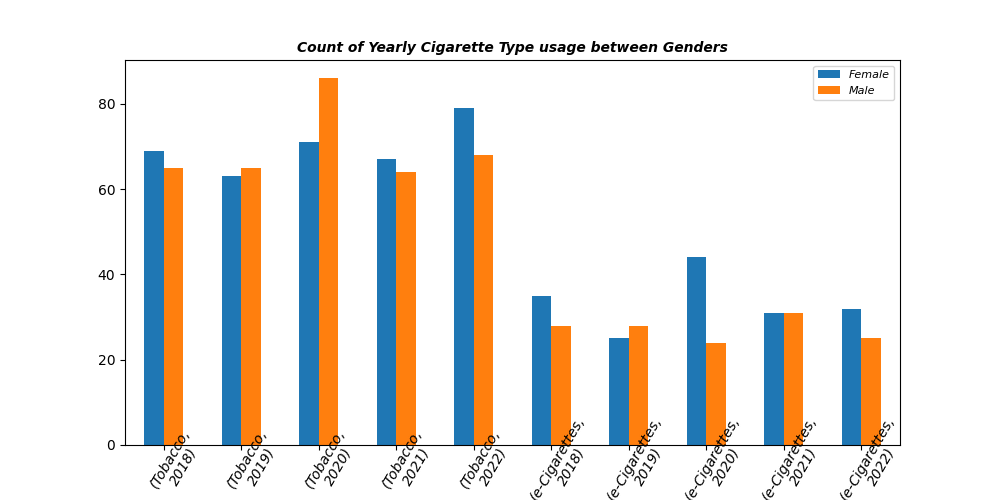

In [552]:
df.groupby(['Type','Year', 'Gender']).size().unstack().plot(kind='bar', stacked=False, figsize=(10, 5), legend=True, fontsize=10)
plt.xticks(fontsize=10, style='oblique', ha='center',
         va='top', wrap=True, rotation = 60)
plt.title("Count of Yearly Cigarette Type usage between Genders",fontsize=10, style='oblique', weight='bold')
plt.legend(loc=1, prop = font)
plt.show()

The use of either e-cigarette or tobacco-based cigarettes among Irish citizens between 2018 and 2022. The usage of tobacco-based cigarettes is higher among females while e-cigarettes usage represents a small cohort of respondents, males tend to have a higher usage. It's interesting to note that a decrease in usage occurred between 2020 and 2021, which may have been triggered by Covid-19.

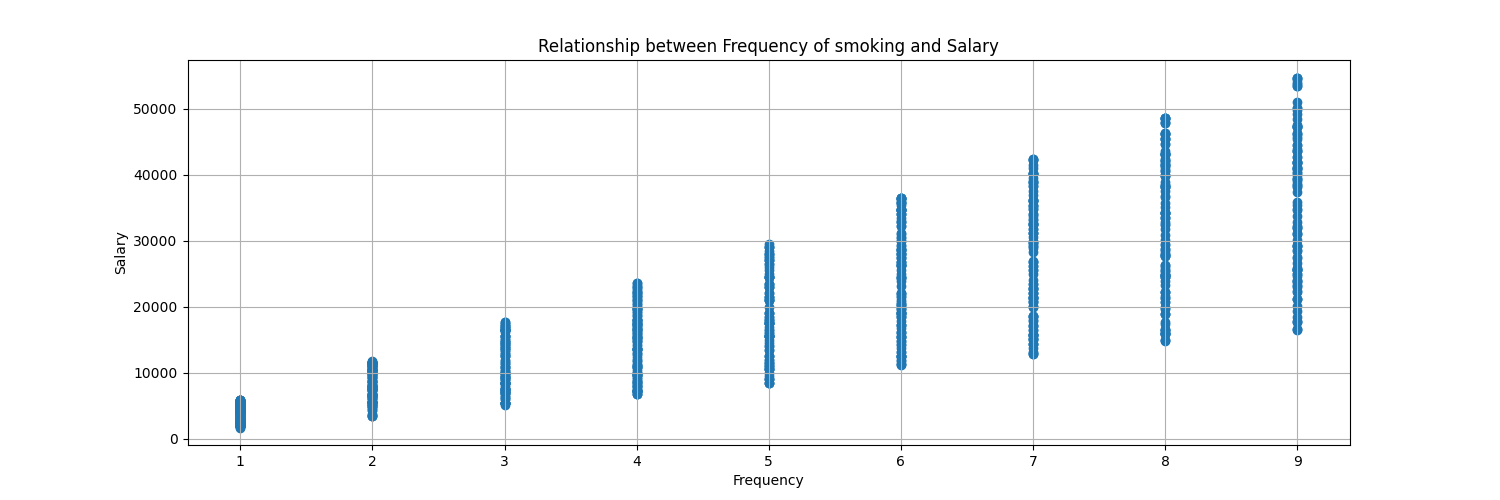

In [554]:
plt.subplots(figsize=(15,5))
plt.scatter(df['Frequency'],df['Salary'])
plt.xlabel('Frequency')
plt.ylabel('Salary')
plt.title('Relationship between Frequency of smoking and Salary')
plt.grid()
plt.show()

The above graph shows that frequency of usage increases with salary. This is an expected outcome, considering that smoking is an expensive habit, and a higher disposable income is needed to finance the habit.

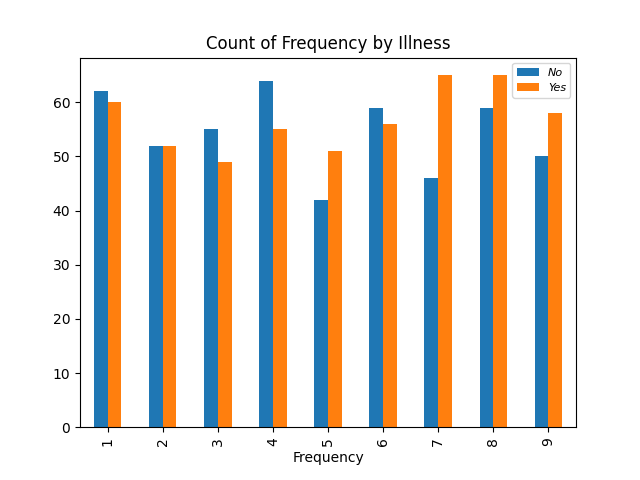

In [555]:
plt.subplots(figsize=(15,5))
df.groupby(['Frequency', 'Illness']).size().unstack().plot(kind='bar', stacked=False)
plt.title("Count of Frequency by Illness")
plt.legend(loc=1, prop = font)
plt.show()

The number of respondents with an underlying illness does not increase with smoking frequency. Do people smoke more frequently when they are not at risk of illness? 

The below charts are split into four subplots with linear lines across the plot showing best available fit for the trend of the cost of smoking with respect to a respondent’s salary. And the data points that we see at extreme top right which are far away from this line are known as outliers in the dataset. The bottom left of the chart shows datapoints more clustered together. There is a higher number of respondents with and underlying health problem who smoke tobacco cigarettes compared to those smoking e-cigarettes. 

By adding hue = gender, we can split the charts even further.

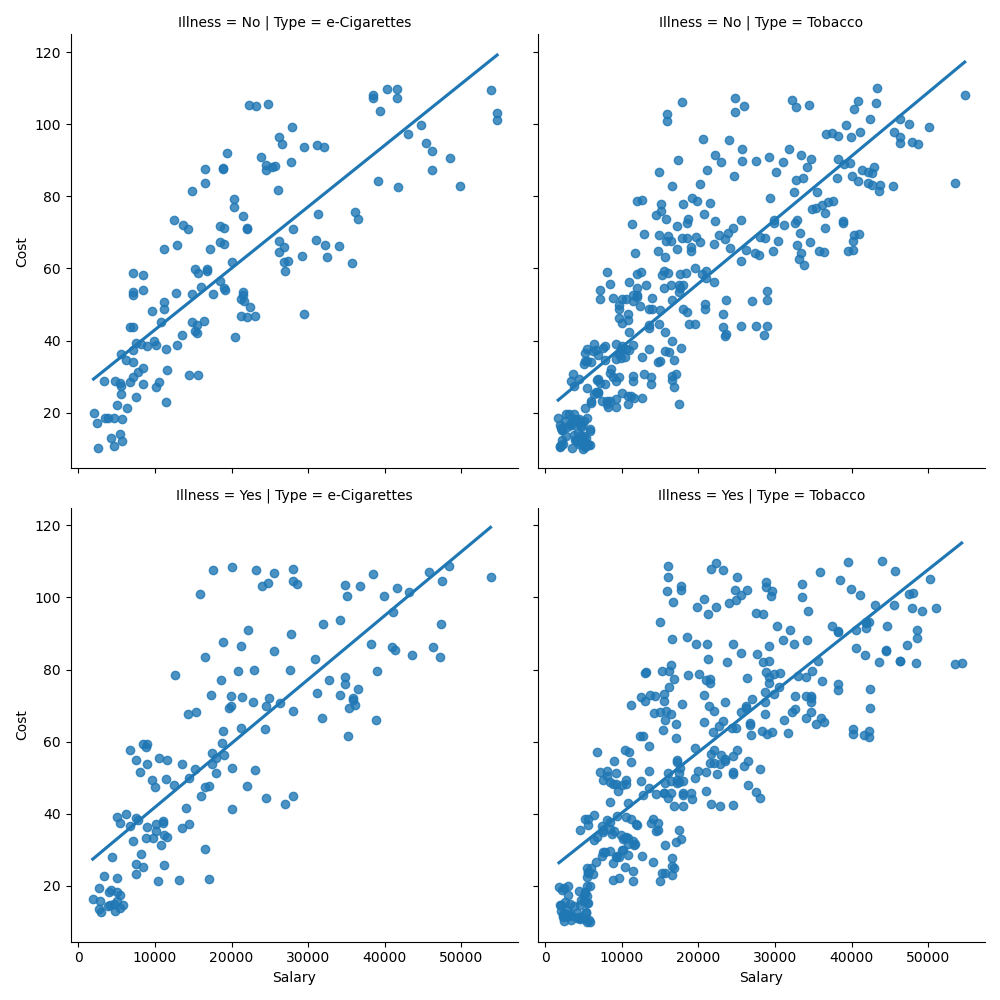

In [556]:
sns.lmplot(x="Salary", y="Cost", col="Type", row="Illness",ci=False,data= df, height=5, aspect =1)
plt.show()

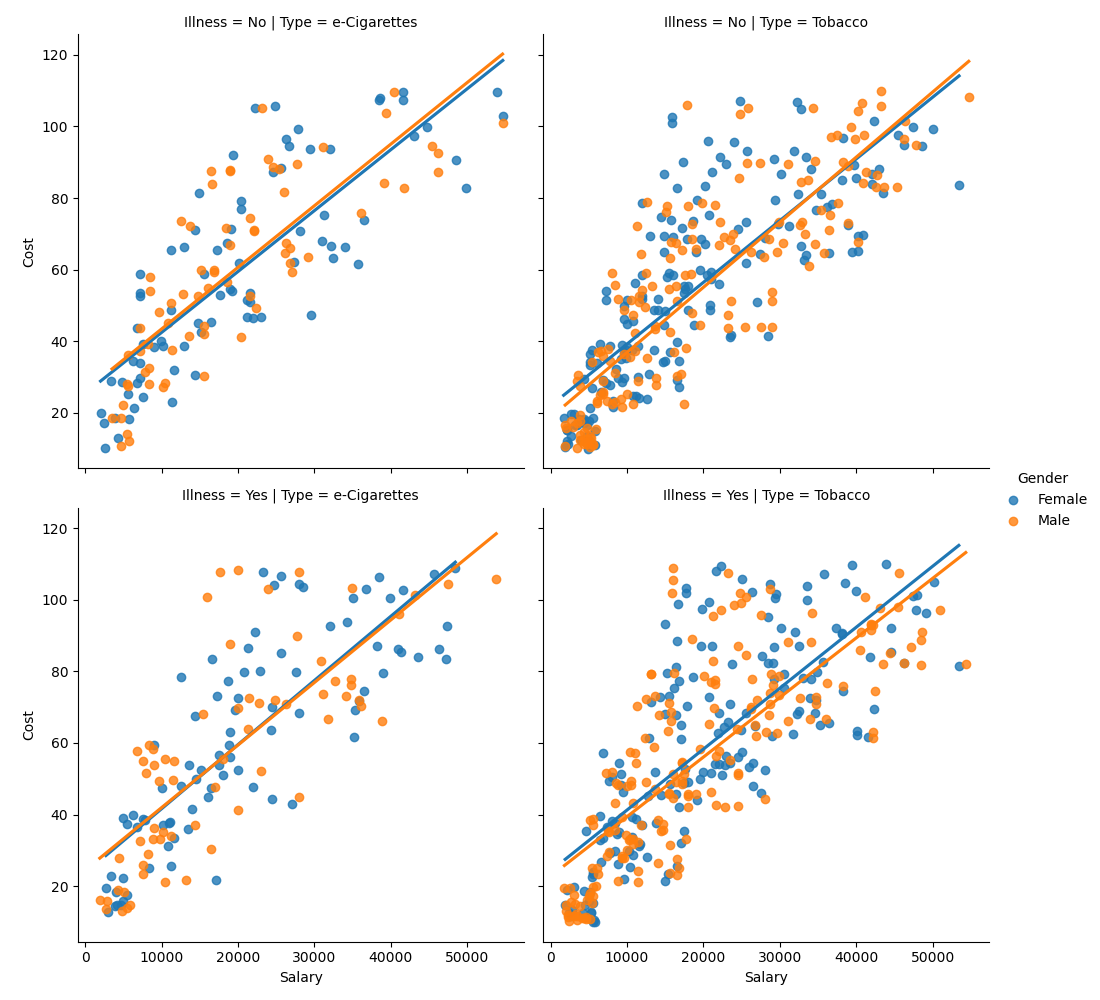

In [557]:
sns.lmplot(x="Salary", y="Cost", col="Type", row="Illness",hue= "Gender", ci=False,data= df, height=5, aspect =1)
plt.show()

From the above chart, there is a higher number of males who smoke e-cigarettes while earning a lower salary compared to females. Males with an underlying illness also tend to spend more on both types of cigarettes. 

Using histograms to determine the distribution of age across respondents, we can see that the highest cohort exist under the age of 21 for females and those who smoke at a frequency of less than 5. The histogram data is split further by splitting the columns by type of smoker. The variable Age doesn't follow a normal distribution, but this is not surprising since the column was generated at random.

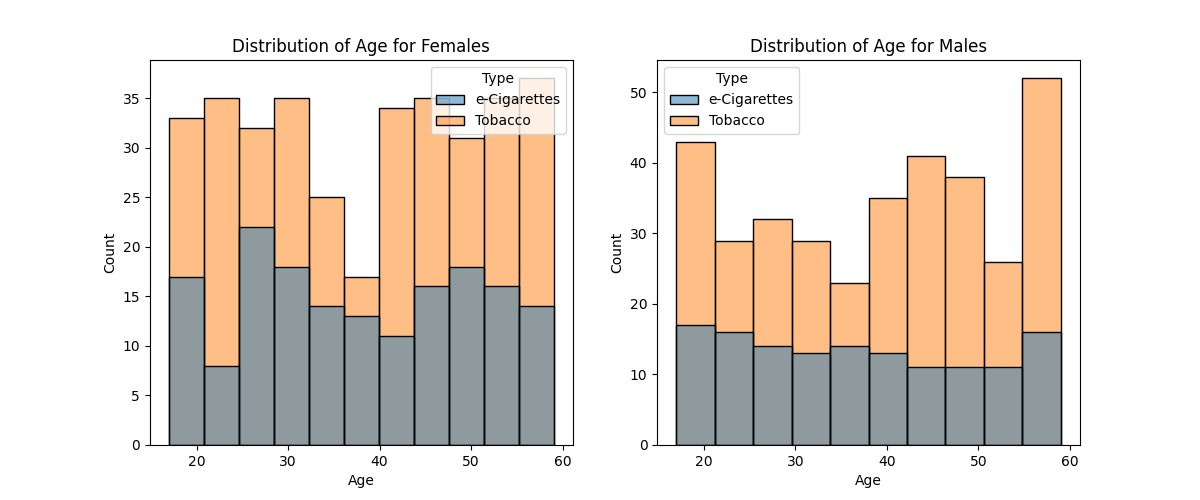

In [558]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
ax = sns.histplot(x= "Age", data =  df[(df.Gender == 'Female')], hue = "Type")
plt.title("Distribution of Age for Females")

plt.subplot(1, 2, 2) # index 2
ax = sns.histplot(x= "Age", data =  df[(df.Gender == 'Male')], hue = "Type")
plt.title("Distribution of Age for Males")
plt.show()

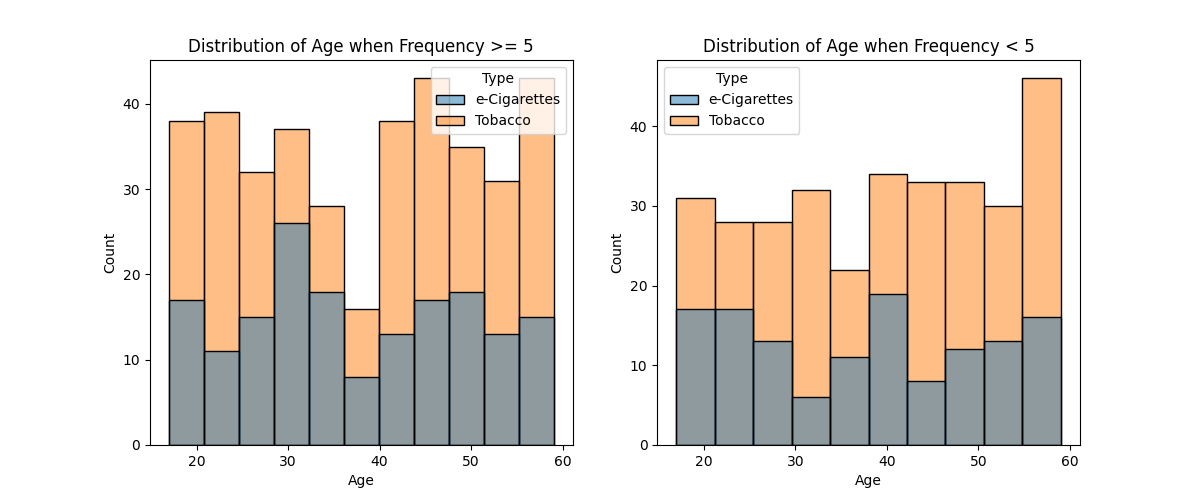

In [559]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
ax = sns.histplot(x= "Age", data =  df[(df.Frequency >= 5)],hue= "Type")
plt.title("Distribution of Age when Frequency >= 5")

plt.subplot(1, 2, 2) # index 2
ax = sns.histplot(x= "Age", data =  df[(df.Frequency < 5)],hue= "Type")
plt.title("Distribution of Age when Frequency < 5")
plt.show()

To determine if there is a correlation between variables, a heatmap was used. 

A high correlation between is represented by 1.0 and a low is close to 0.0. Variables cost and salary were generated based on assumptions to frequency and age, therefore a correlation exists between these variables. Since the other variables were generated at random, a lower correlation exists. 

The correlation plot only includes variables that are numeric, LabelEncoder() package was used to assign numeric values to the string variables. The numeric value was assigned based on alphabetical order i.e Female, Male = 0,1

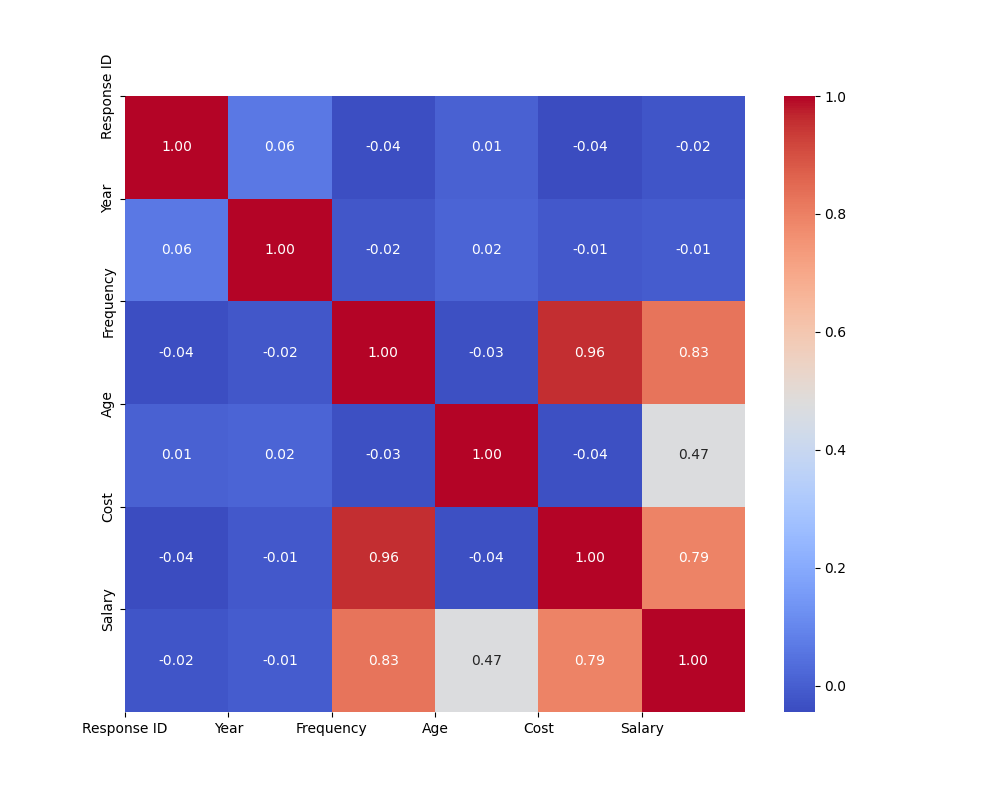

In [560]:
corr = df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [561]:
#### Changes variables to numeric value to determine correlation with cost, based on alphabetical order
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df.Gender) 
df.Gender = le.transform(df.Gender)
# smoker or not
le.fit(df.Type) 
df.Type = le.transform(df.Type)
#region
le.fit(df.Residence) 
df.Residence = le.transform(df.Residence)
#Illness
le.fit(df.Illness) 
df.Illness = le.transform(df.Illness)

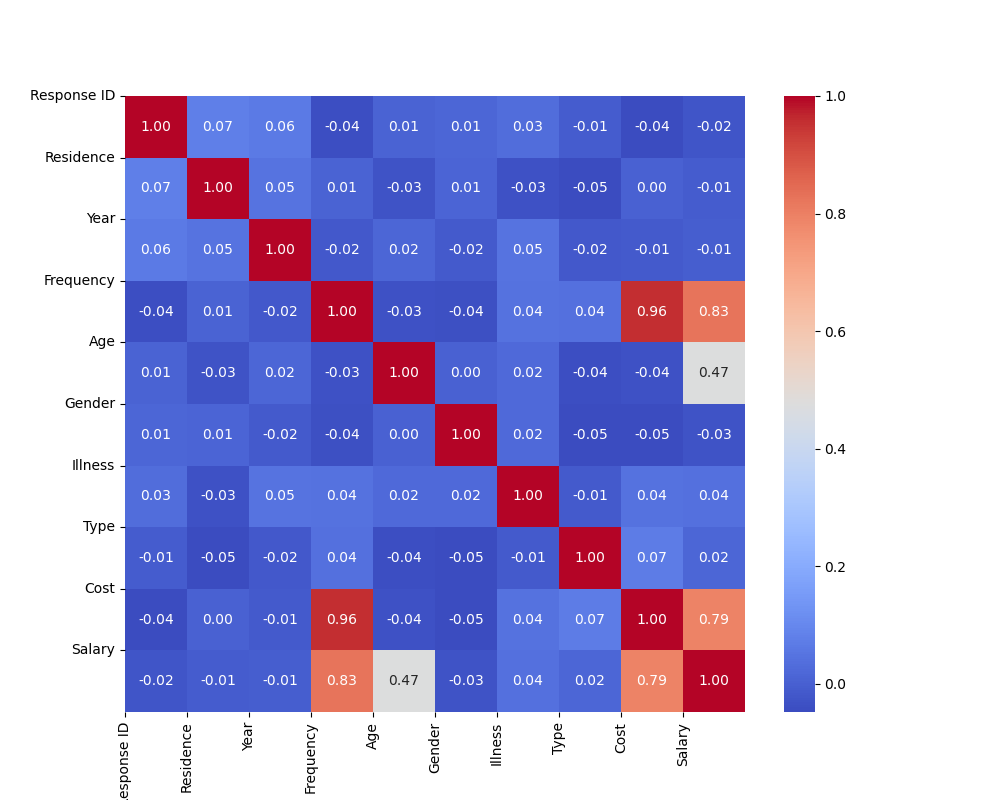

In [562]:
corr = df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()